In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_FDICountry = "https://geostat.ge/media/43842/FDI_Eng-countries.xlsx"
import openpyxl
df_FDICountry = pd.read_excel(url_FDICountry, sheet_name = "FDI (annual)",header = 3, skipfooter = 14)

In [3]:
df_FDICountry

,Code,Countries,1996,1997,1998,1999,2000,2001,2002,2003,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021*
0,NaN,Total,3753.45,242586,265331.769513,82207,131231.878347,109839.835488,160211.960454,334567.84162,...,1048227.045433,1039174.152485,1836979.976503,1728758.129864,1653993.3841,1980773.3426,1317071.4413,1335810.6439,571963.2561,1152817.6186
1,NaN,of which:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,EU counties (27),-,20808.371148,23068.815474,3525.273546,36726.839923,63421.349613,40469.434942,58063.057716,...,370060.669997,369928.682571,727114.37775,417150.402507,327813.0512,558531.1222,416764.4483,426918.626,333129.4972,327877.6462
3,40.0,Austria,-,18688.22432,18876.639337,-,-,-,-137.20896,17971.165858,...,25999.225115,7008.170988,8000.442038,19621.375218,27805.2789,6287.2705,17361.0086,15231.2078,-10654.2515,5937.8846
4,56.0,Belgium,-,-,-,-,-,-,-,-,...,-844.8066,637.3268,1485.556,280.2875,17867.4493,4313.4712,3482.8453,1522.7314,4857.8513,2079.7791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,826.0,United Kingdom,-,24985.511495,26471.589257,5036.176714,4823.975704,8508.687993,14719.529864,34842.840181,...,95536.664823,55171.312715,108850.796451,399346.841345,87849.542,249032.362,182923.8353,236860.4844,302984.8908,596616.9694
80,840.0,United States,-,96651.887424,104427.22618,59151.289331,38717.651556,23281.158381,81609.826028,71603.885369,...,20253.9991,53885.224061,184442.755304,18898.423706,59817.1044,79115.3347,104964.0622,115592.2585,98440.9332,6150.9768
81,NaN,Other countries,-,-,-,-,-,-,-,-,...,21397.446834,14791.355772,12739.540876,14892.9665,15390.8614,12658.9677,4040.125,14903.7709,2196.9728,13401.7552
82,NaN,Unknown,-,-,-,-,-,-,627.86159,853.61444,...,-,-,-,6743.0347,-4702.3455,-,-,-,-,-


In [4]:
df_FDICountry.rename(columns={"2021*":2021}, inplace = True)

In [5]:
df_FDICountry.iloc[2,1] = "EU countries"

In [6]:
df_FDICountry.drop(1, inplace = True)

In [7]:
df_FDICountry.drop(columns = "Code", inplace = True)

In [8]:
df_FDICountry.replace(to_replace = "-", value = 0, inplace = True)

In [9]:
df_FDICountry.head()

,Countries,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Total,3753.45,242586.000000,265331.769513,82207.000000,131231.878347,109839.835488,160211.960454,334567.841620,492329.440023,...,1.048227e+06,1.039174e+06,1.836980e+06,1.728758e+06,1.653993e+06,1.980773e+06,1.317071e+06,1.335811e+06,571963.2561,1.152818e+06
2,EU countries,0.00,20808.371148,23068.815474,3525.273546,36726.839923,63421.349613,40469.434942,58063.057716,107226.112025,...,3.700607e+05,3.699287e+05,7.271144e+05,4.171504e+05,3.278131e+05,5.585311e+05,4.167644e+05,4.269186e+05,333129.4972,3.278776e+05
3,Austria,0.00,18688.224320,18876.639337,0.000000,0.000000,0.000000,-137.208960,17971.165858,23019.989682,...,2.599923e+04,7.008171e+03,8.000442e+03,1.962138e+04,2.780528e+04,6.287270e+03,1.736101e+04,1.523121e+04,-10654.2515,5.937885e+03
4,Belgium,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.448066e+02,6.373268e+02,1.485556e+03,2.802875e+02,1.786745e+04,4.313471e+03,3.482845e+03,1.522731e+03,4857.8513,2.079779e+03
5,Bulgaria,0.00,0.000000,0.000000,46.930700,2172.174954,2238.914739,0.000000,0.000000,0.000000,...,2.269497e+03,2.566308e+03,9.151545e+03,7.196699e+03,1.647168e+03,4.858656e+03,7.426746e+03,5.857047e+03,-1739.1844,4.050176e+03


In [10]:
df_FDICountry.describe(include="all")

,Countries,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,81,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,8.100000e+01,81.000000,8.100000e+01
unique,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Other countries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,139.016667,8984.666667,9827.102575,3044.703704,4860.439939,4068.142055,5920.487506,12365.604606,18221.522208,...,3.803983e+04,3.781286e+04,6.934470e+04,6.345373e+04,6.078465e+04,7.333091e+04,4.876033e+04,4.938948e+04,21165.823743,4.265139e+04
std,NaN,713.265242,35889.069853,38795.186939,14036.778023,18467.613455,15045.649121,23719.452802,44809.913894,65107.169313,...,1.351663e+05,1.333432e+05,2.433453e+05,2.292981e+05,2.178825e+05,2.602933e+05,1.719509e+05,1.773130e+05,89959.160900,1.679632e+05
min,NaN,0.000000,0.000000,-2667.560000,-547.404634,-50.950742,-36.425596,-2215.848880,0.000000,0.000000,...,-5.435377e+03,-4.428540e+04,-1.059804e+05,-3.463844e+04,-8.831696e+04,-9.450772e+04,-8.644045e+04,-3.471626e+04,-210092.413900,-3.977760e+04
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,6.327700e+01,0.000000e+00,7.645000e+00,4.671882e+02,5.052137e+02,5.135460e+01,-84.348800,1.921103e+02
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.269497e+03,2.190028e+03,2.030814e+03,2.204768e+03,3.094233e+03,2.516090e+03,2.028227e+03,2.735859e+03,976.633700,2.508438e+03
75%,NaN,0.000000,0.000000,0.000000,0.000000,41.003056,0.000000,87.774160,1438.500247,1280.000006,...,2.201732e+04,2.310090e+04,2.004815e+04,1.862883e+04,2.548083e+04,1.291344e+04,1.736101e+04,2.240869e+04,6970.890000,9.274351e+03


In [11]:
df_FDICountry.nunique()

Countries    80
1996          2
1997         20
1998         22
1999         19
2000         23
2001         22
2002         27
2003         35
2004         30
2005         48
2006         54
2007         60
2008         59
2009         65
2010         67
2011         70
2012         70
2013         76
2014         76
2015         78
2016         79
2017         81
2018         79
2019         79
2020         79
2021         81
dtype: int64

<AxesSubplot:>

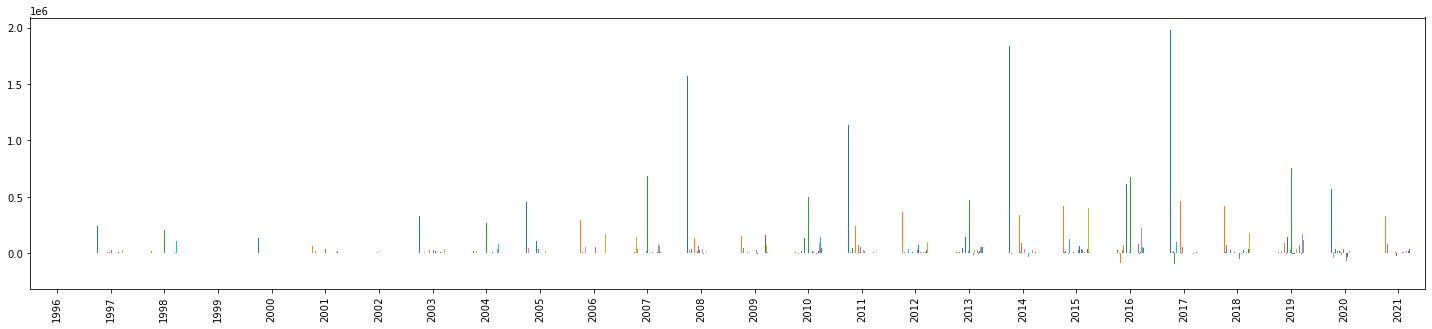

In [12]:
df_FDICountry.set_index("Countries").T.plot(kind = 'bar', figsize = (25,5), legend = False)

In [13]:
df_FDICountry.set_index("Countries", drop = False, inplace = True) #keep Countries also as alist for Plotly

In [14]:
fig1 = px.pie(df_FDICountry.loc[["EU countries","CIS countries", "Other countries"]], values = 2021,names = "Countries", title = "FDI by Country in 2021 (preliminary values)", height = 750)
fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.show()

In [15]:
df_FDICountry2 = df_FDICountry.drop(index = ["Total", "EU countries", "Other countries", "CIS countries"])
df_FDICountry2.drop(columns = "Countries", inplace = True)
df_FDICountry2 = df_FDICountry2.T
df_FDICountry2.reset_index(drop= False, inplace= True)

In [16]:
df_FDICountry2

Countries,index,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,Denmark,Estonia,Finland,...,Seychelles,Switzerland,Syrian,United Arab Emirates,Turkey,Egypt,United Kingdom,United States,Unknown,International Organizations
0,1996,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,1997,18688.224320,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,14950.579456,0.000000,24985.511495,96651.887424,0.00000,0.000000
2,1998,18876.639337,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,15101.311470,0.000000,26471.589257,104427.226180,0.00000,0.000000
3,1999,0.000000,0.000000,46.930700,0.0000,895.013450,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,9831.127839,0.000000,5036.176714,59151.289331,0.00000,0.000000
4,2000,0.000000,0.000000,2172.174954,0.0000,3921.109728,0.000000,0.000000,0.000000,0.0000,...,0.000000,599.017874,0.000000,0.000000,28601.024958,0.000000,4823.975704,38717.651556,0.00000,0.000000
5,2001,0.000000,0.000000,2238.914739,0.0000,19209.077981,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,8456.082302,0.000000,8508.687993,23281.158381,0.00000,0.000000
6,2002,-137.208960,0.000000,0.000000,0.0000,1062.712164,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,8246.377340,0.000000,14719.529864,81609.826028,627.86159,448.531800
7,2003,17971.165858,0.000000,0.000000,0.0000,675.727949,249.770687,0.000000,0.000000,0.0000,...,0.000000,24.812340,0.000000,291.142848,16673.840354,0.000000,34842.840181,71603.885369,853.61444,1235.937360
8,2004,23019.989682,0.000000,0.000000,0.0000,21333.115095,276.575717,0.000000,0.000000,0.0000,...,0.000000,42.634570,0.000000,0.000000,33325.950050,0.000000,85099.450378,80753.732613,268.31440,776.706830
9,2005,14784.520351,0.000000,70.760471,0.0000,47537.321268,1279.555401,318.976155,0.000000,0.0000,...,154.312890,348.385135,0.000000,280.461811,21519.854918,0.000000,131546.397550,15088.925954,328.45036,3279.470620


In [26]:
fig2list = list(df_FDICountry2.columns.values)
#fig2list = list(range(1996,2022))
fig2list.pop(0)

'index'

In [28]:

fig2 = px.area(df_FDICountry2, x='index', y= fig2list)
#fig2 = px.area(df_FDICountry2.T, x=fig2list, y='Countries')
fig2.show()

ValueError: All arguments should have the same length. The length of argument `y` is 78, whereas the length of  previously-processed arguments ['index'] is 26

In [ ]:
fig2list = list(range(1996,2022))
#fig2 = px.area(df_FDICountry2, x="Countries", y = fig2list)
fig2 = px.area(df_FDICountry2.T, x="Countries")
fig2.show()
#fig2list

In [ ]:
df_FDICountry2

In [ ]:
df_FDICountry2.columns.map(type)